<a href="https://colab.research.google.com/github/brunocrt/dnn-archi-style-detector/blob/main/MIT_DeepLearning_April_2025_Capstone_BrunoTinoco_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIT Mastering Neural Networks using Deep Learning
Apr 19 2025

This notebook is the code representing a project to detect software architectural patterns based on its source code.

It is create to detect archictectural patterns on Java based projects from their repositories on Github.

##Summary of steps

- 1️⃣	Select repos to download
- 2️⃣	Pre process .jav files (context + content)
- 3️⃣	Embeddings generation for CodeBERT
- 4️⃣	Train classifier (PyTorch)
- 5️⃣	Test and evaluation

#1 Clone the Github repos

- Filter only .java files
- Extract paths and content of relevant files.
- Store it on JSON file format to make it easier to generate the embeddings for CodeBERT.

In [ ]:
import os
import subprocess
import json
import re
import shutil
from pathlib import Path

# Lista de repositórios: (nome, URL, rótulo de arquitetura)
REPOS = [
    # Existing repositories
    ("spring-petclinic", "https://github.com/spring-projects/spring-petclinic.git", "layered"),
    ("jhipster-sample", "https://github.com/jhipster/jhipster-sample-app.git", "microservices"),
    ("java-design-patterns", "https://github.com/iluwatar/java-design-patterns.git", "monolith"),
    ("quarkus-quickstarts", "https://github.com/quarkusio/quarkus-quickstarts.git", "microservices"),
    ("hexagonal-architecture-java", "https://github.com/SvenWoltmann/hexagonal-architecture-java.git", "hexagonal"),
    ("eventuate-tram-examples-java-spring-todo-list", "https://github.com/eventuate-tram/eventuate-tram-examples-java-spring-todo-list.git", "event-driven"),
    ("spring-boot-mvc-architecture", "https://github.com/VANSHTRIVEDI/spring-boot-mvc-architecture.git", "layered"),
    ("gs-rest-service", "https://github.com/spring-guides/gs-rest-service.git", "layered"),
    ("clean-architecture-example", "https://github.com/mattia-battiston/clean-architecture-example.git", "clean"),
    ("dddsample-core", "https://github.com/citerus/dddsample-core.git", "ddd"),

    # Additional repositories
    ("event-driven", "https://github.com/Uallessonivo/event-driven.git", "event-driven"),
    ("event-driven-microservices-advanced", "https://github.com/Armando1514/Event-Driven-Microservices-Advanced.git", "event-driven"),
    ("domain-driven-design-java-book", "https://github.com/o-s-expert/domain-driven-design-java-book.git", "ddd"),
    ("library", "https://github.com/ddd-by-examples/library.git", "ddd"),
    ("hexagonal-architecture", "https://github.com/anirban99/hexagonal-architecture.git", "hexagonal"),
    ("spring-layered-architecture", "https://github.com/vj12354/spring-layered-architecture.git", "layered"),
    ("layered-architecture", "https://github.com/PramithaMJ/layered-architecture.git", "layered"),
    ("event-driven-architecture", "https://github.com/rkudryashov/event-driven-architecture.git", "event-driven"),
    ("java-event-driven-example", "https://github.com/CafeinoDev/java-event-driven-example.git", "event-driven"),
    ("ddd-example", "https://github.com/ketan-gote/ddd-example.git", "ddd"),
    ("Designing-Hexagonal-Architecture", "https://github.com/CarlosCaride/Designing-Hexagonal-Architecture.git", "hexagonal"),
    ("layered-architecture-java-spring-boot-mysql", "https://github.com/horozal/layered-architecture-java-spring-boot-mysql.git", "layered")
]

DEST_DIR = "repos"
OUTPUT_FILE = "repos_java_dataset.json"

def clone_repo(name, url):
    dest = os.path.join(DEST_DIR, name)
    if not os.path.exists(dest):
        print(f"Cloning {name}...")
        subprocess.run(["git", "clone", "--depth", "1", url, dest], check=True)
    return dest

def remove_license_header(java_code: str) -> str:
    match = re.search(r'^\s*package\s', java_code, re.MULTILINE)
    if match:
        return java_code[match.start():].lstrip()
    else:
        return java_code

def extract_java_files(repo_path):
    java_files = list(Path(repo_path).rglob("*.java"))
    file_contents = []
    for f in java_files:
        try:
            content = f.read_text(encoding='utf-8', errors='ignore')
            if len(content.strip()) > 20:
                cleaned_content = remove_license_header(content)
                file_contents.append({
                    "file_path": str(f.relative_to(repo_path)),
                    "content": cleaned_content
                })
        except Exception as e:
            print(f"Error reading {f}: {e}")
    return file_contents

def delete_non_java_files(repo_path):
    for root, dirs, files in os.walk(repo_path, topdown=False):
        for name in files:
            if not name.endswith(".java"):
                try:
                    os.remove(os.path.join(root, name))
                except Exception:
                    pass
        for name in dirs:
            dir_path = os.path.join(root, name)
            try:
                if not any(Path(dir_path).rglob("*.java")):
                    shutil.rmtree(dir_path)
            except Exception:
                pass

def main():
    os.makedirs(DEST_DIR, exist_ok=True)
    dataset = []

    for name, url, label in REPOS:
        try:
            repo_path = clone_repo(name, url)
            delete_non_java_files(repo_path)
            files = extract_java_files(repo_path)
            dataset.append({
                "repo": name,
                "architecture": label,
                "files": files
            })
            shutil.rmtree(repo_path)  # Cleanup after processing
        except Exception as e:
            print(f"Error on repo {name}: {e}")

    with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
        json.dump(dataset, f, indent=2, ensure_ascii=False)

    print(f"\n✅ Dataset saved at: {OUTPUT_FILE}")

if __name__ == "__main__":
    main()



Cloning spring-petclinic...
Cloning jhipster-sample...
Cloning java-design-patterns...
Cloning quarkus-quickstarts...
Cloning hexagonal-architecture-java...
Cloning eventuate-tram-examples-java-spring-todo-list...
Cloning spring-boot-mvc-architecture...
Cloning gs-rest-service...
Cloning clean-architecture-example...
Cloning dddsample-core...
Cloning event-driven...
Cloning event-driven-microservices-advanced...
Cloning domain-driven-design-java-book...
Cloning library...
Cloning hexagonal-architecture...
Cloning spring-layered-architecture...
Cloning layered-architecture...
Cloning event-driven-architecture...
Cloning java-event-driven-example...
Cloning ddd-example...
Cloning Designing-Hexagonal-Architecture...
Cloning layered-architecture-java-spring-boot-mysql...

✅ Dataset saved at: repos_java_dataset.json


Expected data structure for the dataset

``` JSON
[
  {
    "repo": "spring-petclinic",
    "architecture": "layered",
    "files": [
      {
        "file_path": "src/main/java/org/springframework/OwnerController.java",
        "content": "package org.springframework...\npublic class OwnerController {...}"
      },
      ...
    ]
  }
]

```



##2 Pre Process files

Transformamos os arquivos .java de cada repositório em exemplos de treino, extraindo:

- Pacote (via regex)
- Nome do arquivo
- Detecção simples do tipo de classe (Controller, Service, Repository)

In [ ]:
import json
import re

def process_file(file_entry):
    path = file_entry["file_path"]
    content = file_entry["content"]

    # Extração de tipo de classe (Controller, Service, etc.)
    class_type = "other"
    if "controller" in path.lower():
        class_type = "controller"
    elif "service" in path.lower():
        class_type = "service"
    elif "repository" in path.lower():
        class_type = "repository"
    elif "model" in path.lower():
        class_type = "model"

    # Extração do nome do pacote
    match = re.search(r'package\s+([\w\.]+);', content)
    package_name = match.group(1) if match else ""

    # Retorno: concatenação de contexto + conteúdo (truncado)
    return f"{package_name} {path} {class_type}\n{content[:2048]}"


In [ ]:
def load_dataset(json_path):
    data = []
    with open(json_path, encoding='utf-8') as f:
        repos = json.load(f)

    for repo in repos:
        label = repo["architecture"]
        for file in repo["files"]:
            processed = process_file(file)
            data.append({
                "text": processed,
                "label": label
            })
    return data


##3 Generate Embeddings with CodeBERT + Tokenization

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
#from transformers import RobertaTokenizer, RobertaModel
from transformers import AutoModel, AutoTokenizer
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)

def generate_codebert_embedding(text: str):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    tokens = {k: v.to(device) for k, v in tokens.items()}
    with torch.no_grad():
        outputs = codebert(**tokens)
        embedding = outputs.last_hidden_state[:, 0, :]
    return embedding.squeeze(0)

def prepare_embeddings(data, label_map):
    all_embeddings = []
    all_labels = []
    for sample in data:
        emb = generate_codebert_embedding(sample["text"])
        all_embeddings.append(emb)
        all_labels.append(torch.tensor(label_map[sample["label"]], dtype=torch.long))
    return torch.stack(all_embeddings), torch.stack(all_labels)

In [ ]:
import torch
from torch.utils.data import Dataset

# Pytorch Dataset
class CodeTensorDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]


## 4 Trainning

In [ ]:
import torch.nn as nn
from torch.utils.data import DataLoader, random_split

# class SimpleClassifier(nn.Module):
#     def __init__(self, input_size=768, num_classes=6):
#         super().__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(input_size, 128),
#             nn.ReLU(),
#             nn.Linear(128, num_classes)
#         )

#     def forward(self, x):
#         return self.fc(x)

class ArchitectureClassifier(nn.Module):
    def __init__(self, input_dim=768, num_classes=7):
        super().__init__()
        self.linear = nn.Sequential(

            ##nn.Linear(input_dim, 128),
            ##nn.ReLU(),
            ##nn.Linear(128, num_classes)

            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.linear(x)
model = ArchitectureClassifier().to(device)

In [ ]:
def train(model, dataloader, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(epochs):

        model.train()
        total_loss = 0

        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            preds = model(X)
            loss = criterion(preds, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")


## 5 Testing and Evaluation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

def evaluate(model, dataloader, label_map):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            out = model(X)
            preds = torch.argmax(out, dim=1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    acc = (torch.tensor(y_true) == torch.tensor(y_pred)).sum().item() / len(y_true)
    print(f"Acurácia: {acc:.2%}\n")

    target_names = list(label_map.keys())
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=target_names))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title("Matriz de Confusão")
    plt.tight_layout()
    plt.show()

## Pipeline Execution

## Load Dataset

In [ ]:
data = load_dataset("repos_java_dataset.json")
unique_labels = list(set(d["label"] for d in data))
label_map = {label: idx for idx, label in enumerate(unique_labels)}

embeddings, labels = prepare_embeddings(data, label_map)
dataset = CodeTensorDataset(embeddings, labels)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=8)
val_loader = DataLoader(val_ds, batch_size=8)

## Train the model

In [ ]:
model = ArchitectureClassifier(num_classes=len(label_map)).to(device)
train(model, train_loader, epochs=10)


Epoch 1: Loss = 738.4430
Epoch 2: Loss = 660.6884
Epoch 3: Loss = 542.5755
Epoch 4: Loss = 453.1965
Epoch 5: Loss = 389.1277
Epoch 6: Loss = 348.9977
Epoch 7: Loss = 321.4242
Epoch 8: Loss = 295.4136
Epoch 9: Loss = 281.5424
Epoch 10: Loss = 266.9647


## Evaluate

Acurácia: 83.26%


Relatório de Classificação:
               precision    recall  f1-score   support

          ddd       0.55      0.15      0.24        78
        clean       0.00      0.00      0.00        11
     monolith       0.87      0.99      0.93       335
 event-driven       0.88      0.63      0.73        78
microservices       0.75      0.90      0.81       193
    hexagonal       0.87      0.95      0.91       219
      layered       0.00      0.00      0.00        18

     accuracy                           0.83       932
    macro avg       0.56      0.52      0.52       932
 weighted avg       0.79      0.83      0.80       932



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


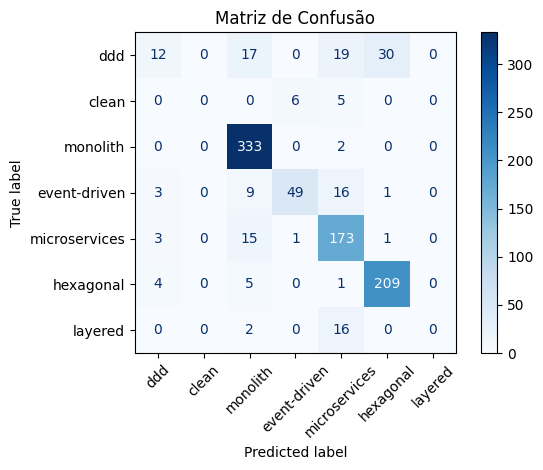

In [ ]:
evaluate(model, val_loader, label_map)